In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

KeyError: 'hours'

<Figure size 864x432 with 0 Axes>

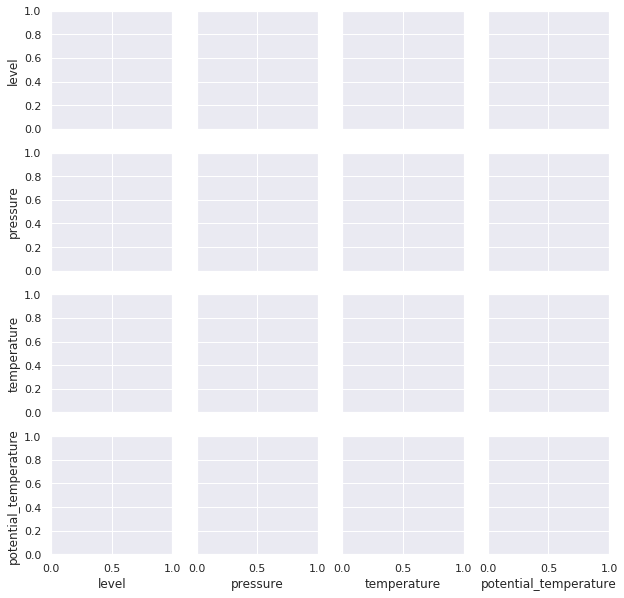

In [19]:
with open('output.txt', 'r') as file:
    raw = file.readlines()
get_list = ['level:','p:','T:','theta:']
info_list= [(i) for i in raw for word in get_list if i.startswith(word)]
df = pd.DataFrame(info_list, columns=['col_1'])
l = ['level:','p:','T:','theta:','\n']
df[['level','pressure','temperature','potential_temperature']] = df.col_1.str.replace('|'.join(l), '', regex=True).str.strip().str.split(expand=True)
df.drop('col_1', axis=1, inplace=True)
df = df.astype(float)
nlayer=10
n_steps = 100000+1
output_steps = 50000
s = pd.Series(np.arange(0,n_steps,output_steps)).repeat(nlayer)
s = pd.DataFrame(s,columns=['hours'])
s.reset_index(drop=True, inplace=True)
df1 = pd.concat([df,s],axis=1)
plt.figure(figsize=(12,6))
sns.pairplot(data=df1.loc[:,['level','pressure','temperature','potential_temperature']], hue="hours")
plt.show()

In [13]:
df1

,level,pressure,temperature,potential_temperature,hours
0,0.0,50.0,180.0,423.6,0
1,1.0,150.0,190.0,326.7,0
2,2.0,250.0,200.0,297.2,0
3,3.0,350.0,210.0,283.5,0
4,4.0,450.0,220.0,276.4,0
5,5.0,550.0,231.0,274.0,0
6,6.0,650.0,241.2,272.8,0
7,7.0,750.0,250.9,272.4,0
8,8.0,850.0,259.1,271.4,0
9,9.0,950.0,267.5,271.4,0
